In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("Salary_Data.csv")

In [34]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Correlation

In [9]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


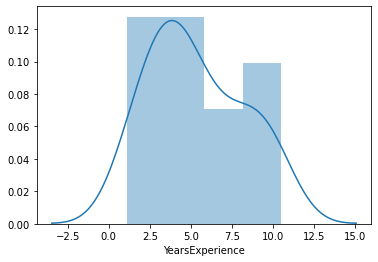

In [11]:
sns.distplot(data['YearsExperience'])

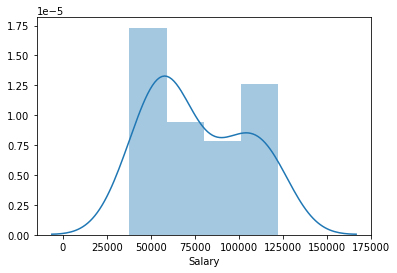

In [12]:
sns.distplot(data['Salary'])

# Fitting a linear Regression model

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

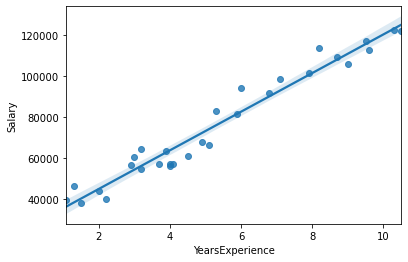

In [19]:
sns.regplot(x='YearsExperience',y='Salary',data = data)

In [21]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict for a new data point

In [27]:
Salary = 25792.200199+(9449.962321*20000)
Salary

189025038.62019902

In [43]:
newdata=pd.Series([15.5, 12.5, 13.1, 16, 17])

In [44]:
data_for_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [45]:
data_for_pred

,YearsExperience
0,15.5
1,12.5
2,13.1
3,16.0
4,17.0


In [46]:
#Prediction from model
model.predict(data_for_pred)

0    172266.616181
1    143916.729217
2    149586.706610
3    176991.597342
4    186441.559663
dtype: float64